# 🧪 PREDIÇÃO DE DESLIZAMENTO USANDO SVM | TESTE II

## Criação do dataset

In [30]:
# Importar bibliotecas

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [5]:
# Importar dataset

deslizamentos_dataset = pd.read_excel(r"C:\Users\e109513\OneDrive - Tokio Marine Seguradora S A\Área de Trabalho\deslizamentos_testes_2.1.xlsx")
print(deslizamentos_dataset.head()) # mostra as primeiras 5 linhas

   indice_pluviometrico  umidade  temperatura  deslizamento
0                     0        2           24             0
1                    10       10           24             0
2                    10       13           24             0
3                     0       10           24             0
4                    20       27           24             0


In [6]:
# Verificar o total de linhas e colunas no dataset

deslizamentos_dataset.shape

(1000, 4)

In [7]:
# Descrever dados estatísticos do dataset

deslizamentos_dataset.describe()

,indice_pluviometrico,umidade,temperatura,deslizamento
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.646000,42.735000,23.755000,0.026000
std,17.938408,25.243098,0.762599,0.159215
min,0.000000,0.000000,22.000000,0.000000
25%,11.000000,23.000000,23.000000,0.000000
50%,23.000000,41.000000,24.000000,0.000000
75%,38.000000,60.000000,24.000000,0.000000
max,98.000000,146.000000,26.000000,1.000000


In [8]:
# Verificar o número de ocorrências de deslizamento e não deslizamento (sim e não)

deslizamentos_dataset['deslizamento'].value_counts()

0    974
1     26
Name: deslizamento, dtype: int64

In [9]:
X = deslizamentos_dataset.drop(columns='deslizamento', axis=1)
Y = deslizamentos_dataset['deslizamento']

In [10]:
print (X)

     indice_pluviometrico  umidade  temperatura
0                       0        2           24
1                      10       10           24
2                      10       13           24
3                       0       10           24
4                      20       27           24
..                    ...      ...          ...
995                    50       51           24
996                    22       86           25
997                    40       29           24
998                    53       77           23
999                     2       22           24

[1000 rows x 3 columns]


In [11]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    1
999    0
Name: deslizamento, Length: 1000, dtype: int64


In [12]:
scaler = StandardScaler() #criação de instância

In [13]:
scaler.fit(X) #fiting de X

StandardScaler()

In [14]:
standarized_data = scaler.transform(X) #transformar data

In [15]:
X = standarized_data #alimentando os dados padronizados para a variável X

In [16]:
print(X)
print(Y)

[[-1.43038519 -1.6145159   0.32143071]
 [-0.87264317 -1.29743901  0.32143071]
 [-0.87264317 -1.17853517  0.32143071]
 ...
 [ 0.8005829  -0.54438139  0.32143071]
 [ 1.52564752  1.35807996 -0.99053136]
 [-1.31883678 -0.82182367  0.32143071]]
0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    1
999    0
Name: deslizamento, Length: 1000, dtype: int64


In [17]:
#dividindo o conjunto de dados na proporção 80/20 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify = Y, random_state=2)

In [18]:
print(X.shape, X_test.shape, X_train.shape)

(1000, 3) (200, 3) (800, 3)


## 🦾 Criação do modelo


In [19]:
classifier = svm.SVC(kernel='linear')

In [20]:
# Treinar modelo usando o dataset de teste
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [21]:
# Acurácia nos dados de treinamento
train_pred = classifier.predict(X_train)
accuracy_train = accuracy_score(train_pred, Y_train)

In [22]:
print("Pontuação de acurácia dos dados de treinamento = {}".format(accuracy_train))

Pontuação de acurácia dos dados de treinamento = 0.97375


In [23]:
#Acurácia no dados de teste
test_pred = classifier.predict(X_test)
accuracy_test = accuracy_score(test_pred, Y_test)

In [24]:
print("Pontuação de acurácia dos dados de teste = {}".format(accuracy_test))

Pontuação de acurácia dos dados de teste = 0.975


## 🔮 Sistema de predição 

In [25]:
input_data = (600, 99, 24)

# Transformar dados de entrada em um array
data_changed = np.asarray(input_data)

# Remodelar para predição de apenas uma instância
data_reshaped = data_changed.reshape(1,-1)

# Padronizar dados de entrada
std_data = scaler.transform(data_reshaped)
print(std_data)

# Predição com os valores de entrada
prediction = classifier.predict(std_data)
if prediction == 1:
    print ("Vai ocorrer deslizamento")
else:
    print("Não vai ocorrer deslizamento")

[[32.03413605  2.23004141  0.32143071]]
Não vai ocorrer deslizamento


C:\Users\e109513\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 📊 Outras métricas do modelo

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

C:\Users\e109513\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


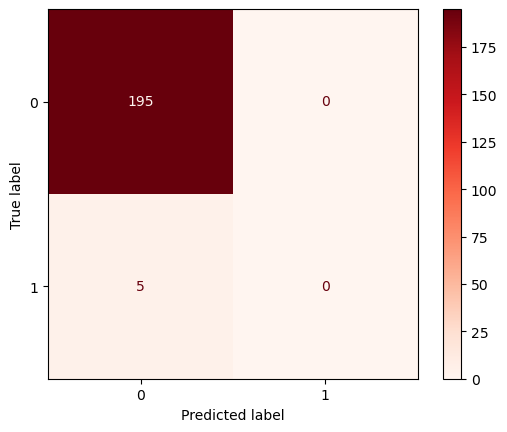

In [39]:
cm = confusion_matrix(Y_test, test_pred)

# Plot confusion matrix
plot_confusion_matrix(classifier, X_test, Y_test, cmap=plt.cm.Reds)
plt.show()

In [40]:
from sklearn.model_selection import learning_curve

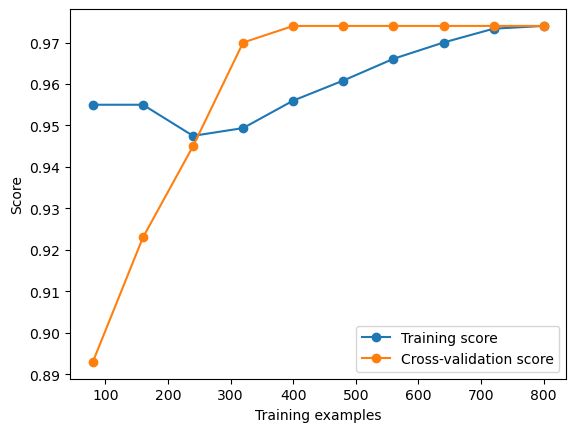

In [41]:
train_sizes, train_scores, test_scores = learning_curve(classifier, X, Y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.show()

In [42]:
from sklearn.metrics import roc_curve, auc

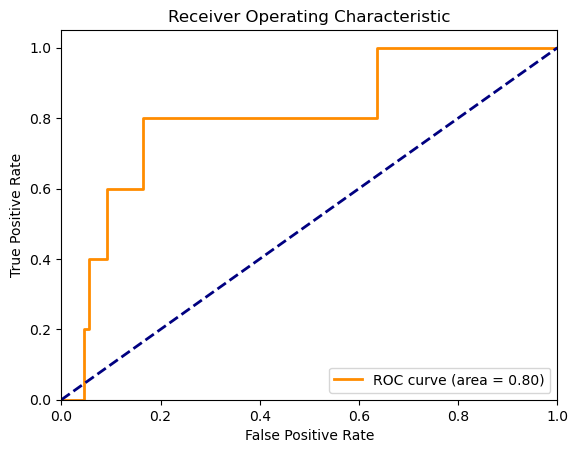

In [43]:
#Acurácia no dados de teste
test_pred = classifier.predict(X_test)
accuracy_test = accuracy_score(test_pred, Y_test)

# ROC curve
fpr, tpr, _ = roc_curve(Y_test, classifier.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [44]:
from sklearn.metrics import precision_recall_curve

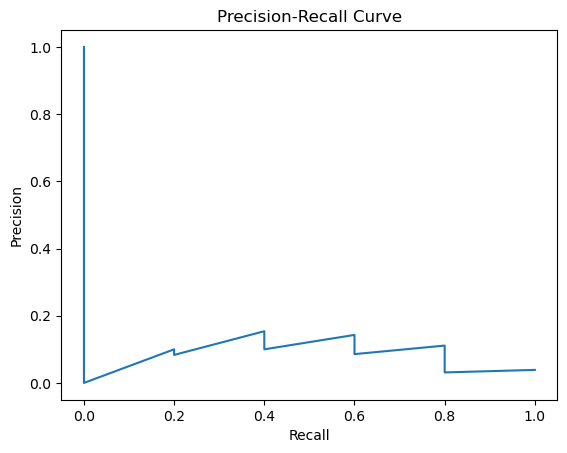

In [45]:
# Predict probabilities of positive class for test set
y_score = classifier.decision_function(X_test)

# Compute precision and recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, y_score)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

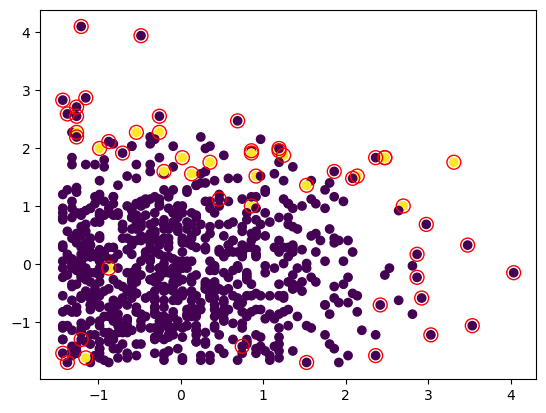

In [50]:
# Obter os vetores de suporte a partir do treinamento
support_vectors = classifier.support_vectors_

# Plotar os pontos do dataset de treinamento
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)

# Plotar os vetores de suporte em amarelo 
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='r')

plt.show()

In [51]:
from mpl_toolkits.mplot3d import Axes3D

ValueError: Argument Z must be 2-dimensional.

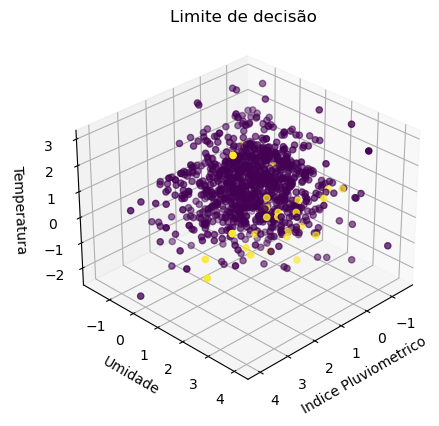

In [57]:
# Create a mesh grid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1),
                         np.arange(z_min, z_max, 0.1))

# Make predictions for each point in the mesh grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)

# Create a 3D plot of the decision boundary
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y)
ax.set_xlabel('Indice Pluviometrico')
ax.set_ylabel('Umidade')
ax.set_zlabel('Temperatura')
ax.set_title('Limite de decisão')
ax.view_init(30, 45)
ax.plot_surface(xx, yy, Z, alpha=0.2)
plt.show()